In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

trainData=pd.read_csv("./train.csv",header=0)
testData=pd.read_csv("./test.csv",header=0)

trainData.head()

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state,Education
0,0,M.K. Mohan,ANNA NAGAR,DMK,4,211 Crore+,2 Crore+,TAMIL NADU,8th Pass
1,1,Khatik Ramesh Prasad,KARERA (SC),BJP,0,1 Crore+,0,MADHYA PRADESH,12th Pass
2,2,Dr. Mantar Gowda,MADIKERI,INC,0,7 Crore+,22 Lac+,KARNATAKA,Post Graduate
3,3,Kundan Kumar,BEGUSARAI,BJP,0,9 Crore+,24 Lac+,BIHAR,Post Graduate
4,4,Swapan Majumder,BANGAON DAKSHIN (SC),BJP,2,2 Crore+,61 Lac+,WEST BENGAL,8th Pass


### converting liabilities and assets to int

In [2]:
# Define conversion factors for different units to Crore
conversion_factors = {
    'Crore+': 1,
    'Lac+': 0.01,  
    'Thou+': 0.0001, 
    'Hund+': 0.00001,
    "0": 0,
}

# Function to convert values to Crore
def convert_to_crore(value, unit):
    factor = conversion_factors.get(unit, None)
    if factor is not None:
        return value * factor
    else:
        raise ValueError("Conversion factor for unit '{}' is not defined.".format(unit))

# Apply conversion to the 'Total Assets' column
def convert_column(value):
    parts = value.split()
    amount = float(parts[0])
    unit = parts[-1]
    return convert_to_crore(amount, unit)

# Convert 'Total Assets' column to Crore
trainData['Total Assets'] = trainData['Total Assets'].apply(convert_column)
testData['Total Assets'] = testData['Total Assets'].apply(convert_column)

trainData['Liabilities'] = trainData['Liabilities'].apply(convert_column)
testData['Liabilities'] = testData['Liabilities'].apply(convert_column)

trainData.head()

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state,Education
0,0,M.K. Mohan,ANNA NAGAR,DMK,4,211.0,2.00,TAMIL NADU,8th Pass
1,1,Khatik Ramesh Prasad,KARERA (SC),BJP,0,1.0,0.00,MADHYA PRADESH,12th Pass
2,2,Dr. Mantar Gowda,MADIKERI,INC,0,7.0,0.22,KARNATAKA,Post Graduate
3,3,Kundan Kumar,BEGUSARAI,BJP,0,9.0,0.24,BIHAR,Post Graduate
4,4,Swapan Majumder,BANGAON DAKSHIN (SC),BJP,2,2.0,0.61,WEST BENGAL,8th Pass


### Encoding states and parties using mapping


In [3]:

total_states = trainData["state"].unique()
total_parties = trainData["Party"].unique()

# Create total_states columns
for state in total_states:
    trainData[state] = (trainData["state"] == state).astype(bool)
    testData[state] = (testData["state"] == state).astype(bool)

# Create total_parties columns
for party in total_parties:
    trainData[party] = (trainData["Party"] == party).astype(bool)
    testData[party] = (testData["Party"] == party).astype(bool)


trainData.head()

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state,Education,TAMIL NADU,...,CPI(M),NCP,TDP,NDPP,CPI,Sikkim Krantikari Morcha,JD(U),JMM,JD(S),Tipra Motha Party
0,0,M.K. Mohan,ANNA NAGAR,DMK,4,211.0,2.00,TAMIL NADU,8th Pass,True,...,False,False,False,False,False,False,False,False,False,False
1,1,Khatik Ramesh Prasad,KARERA (SC),BJP,0,1.0,0.00,MADHYA PRADESH,12th Pass,False,...,False,False,False,False,False,False,False,False,False,False
2,2,Dr. Mantar Gowda,MADIKERI,INC,0,7.0,0.22,KARNATAKA,Post Graduate,False,...,False,False,False,False,False,False,False,False,False,False
3,3,Kundan Kumar,BEGUSARAI,BJP,0,9.0,0.24,BIHAR,Post Graduate,False,...,False,False,False,False,False,False,False,False,False,False
4,4,Swapan Majumder,BANGAON DAKSHIN (SC),BJP,2,2.0,0.61,WEST BENGAL,8th Pass,False,...,False,False,False,False,False,False,False,False,False,False


### Encoding Education column of trainData


In [4]:
mapper = {'Others':0 ,'Literate': 1, '5th Pass': 2, '8th Pass': 3, '10th Pass': 4, '12th Pass': 5, 'Graduate': 6, 'Post Graduate': 7, 'Graduate Professional': 8, 'Doctorate': 9}
reverse_mapper = {0:'Others' ,1:'Literate', 2:'5th Pass', 3:'8th Pass', 4:'10th Pass', 5:'12th Pass', 6:'Graduate', 7:'Post Graduate', 8:'Graduate Professional', 9:'Doctorate'}
trainData['Education'] = trainData['Education'].map(mapper)

trainData.head()

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state,Education,TAMIL NADU,...,CPI(M),NCP,TDP,NDPP,CPI,Sikkim Krantikari Morcha,JD(U),JMM,JD(S),Tipra Motha Party
0,0,M.K. Mohan,ANNA NAGAR,DMK,4,211.0,2.00,TAMIL NADU,3,True,...,False,False,False,False,False,False,False,False,False,False
1,1,Khatik Ramesh Prasad,KARERA (SC),BJP,0,1.0,0.00,MADHYA PRADESH,5,False,...,False,False,False,False,False,False,False,False,False,False
2,2,Dr. Mantar Gowda,MADIKERI,INC,0,7.0,0.22,KARNATAKA,7,False,...,False,False,False,False,False,False,False,False,False,False
3,3,Kundan Kumar,BEGUSARAI,BJP,0,9.0,0.24,BIHAR,7,False,...,False,False,False,False,False,False,False,False,False,False
4,4,Swapan Majumder,BANGAON DAKSHIN (SC),BJP,2,2.0,0.61,WEST BENGAL,3,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
testData.head()

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state,TAMIL NADU,MADHYA PRADESH,...,CPI(M),NCP,TDP,NDPP,CPI,Sikkim Krantikari Morcha,JD(U),JMM,JD(S),Tipra Motha Party
0,0,Geeta Bharat Jain,MEERA BHAYANDAR,IND,2,70.0,11.00,MAHARASHTRA,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,Becharam Manna,SINGUR,AITC,1,2.0,0.13,WEST BENGAL,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,Sunil Vijay Tingre,VADGAON SHERI,NCP,3,49.0,1.00,MAHARASHTRA,False,False,...,False,True,False,False,False,False,False,False,False,False
3,3,Asit Mazumder (Tapan),CHUNCHURA,AITC,1,2.0,0.00,WEST BENGAL,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4,Hriday Narayan Singh Patel,SAGRI,SP,0,16.0,2.00,UTTAR PRADESH,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
trainData["Criminal Case"]=trainData["Criminal Case"]/trainData["Criminal Case"].max()
testData["Criminal Case"]=testData["Criminal Case"]/testData["Criminal Case"].max()

trainData["Total Assets"]=trainData["Total Assets"]/trainData["Total Assets"].max()
testData["Total Assets"]=testData["Total Assets"]/testData["Total Assets"].max()

trainData["Liabilities"]=trainData["Liabilities"]/trainData["Liabilities"].max()
testData["Liabilities"]=testData["Liabilities"]/testData["Liabilities"].max()

trainData.head()

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state,Education,TAMIL NADU,...,CPI(M),NCP,TDP,NDPP,CPI,Sikkim Krantikari Morcha,JD(U),JMM,JD(S),Tipra Motha Party
0,0,M.K. Mohan,ANNA NAGAR,DMK,0.045977,0.166535,0.002270,TAMIL NADU,3,True,...,False,False,False,False,False,False,False,False,False,False
1,1,Khatik Ramesh Prasad,KARERA (SC),BJP,0.000000,0.000789,0.000000,MADHYA PRADESH,5,False,...,False,False,False,False,False,False,False,False,False,False
2,2,Dr. Mantar Gowda,MADIKERI,INC,0.000000,0.005525,0.000250,KARNATAKA,7,False,...,False,False,False,False,False,False,False,False,False,False
3,3,Kundan Kumar,BEGUSARAI,BJP,0.000000,0.007103,0.000272,BIHAR,7,False,...,False,False,False,False,False,False,False,False,False,False
4,4,Swapan Majumder,BANGAON DAKSHIN (SC),BJP,0.022989,0.001579,0.000692,WEST BENGAL,3,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:

# Define the features that we want to use for training
features = trainData.copy()
features.drop(['ID','Candidate','Constituency ∇', 'Party', 'state', 'Education'], axis=1, inplace=True)

# Define the target variable
target = trainData['Education']


In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score , classification_report
from sklearn.preprocessing import StandardScaler


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.01, random_state=42)



### KNN

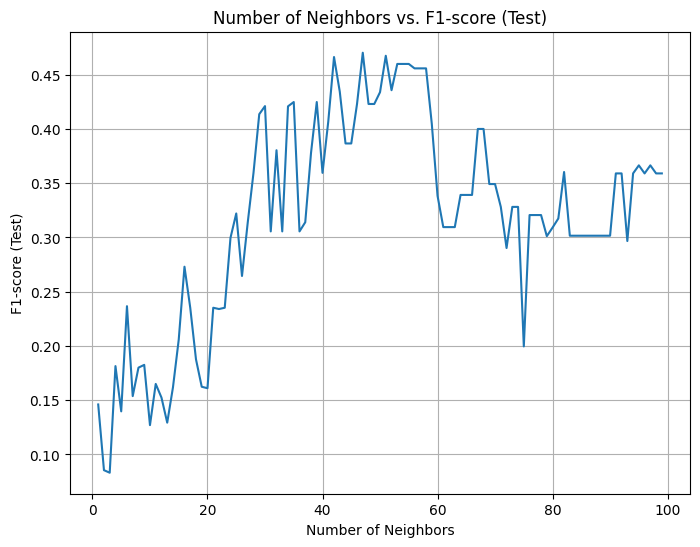

Best number of neighbors: 47


In [10]:
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid for grid search
param_grid = {
    'n_neighbors': range(1, 100)
}

# Create the model and perform grid search with cross-validation
model_knn = KNeighborsClassifier()

# Get the test set F1-scores for each n_neighbors value
test_f1_scores = []
for n in param_grid['n_neighbors']:
    model_knn.set_params(n_neighbors=n,n_jobs=-1)
    model_knn.fit(X_train, y_train)
    y_pred = model_knn.predict(X_test)
    test_f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

# Plot the graph between n_neighbors and F1-score
plt.figure(figsize=(8, 6))
plt.plot(param_grid['n_neighbors'], test_f1_scores)
plt.xlabel('Number of Neighbors')
plt.ylabel('F1-score (Test)')
plt.title('Number of Neighbors vs. F1-score (Test)')
plt.grid()
plt.show()

max_score_index = test_f1_scores.index(max(test_f1_scores))
best_neighbor = list(param_grid['n_neighbors'])[max_score_index]

print(f'Best number of neighbors: {best_neighbor}')


In [11]:
model_knn.set_params(n_neighbors=best_neighbor,n_jobs=-1)
model_knn.fit(features, target)

y_pred = model_knn.predict(X_test)
print(classification_report(y_test, y_pred,zero_division=1))

              precision    recall  f1-score   support

           3       1.00      0.00      0.00         1
           4       0.50      1.00      0.67         1
           5       0.20      0.33      0.25         3
           6       0.62      0.83      0.71         6
           7       0.75      0.50      0.60         6
           8       0.50      0.25      0.33         4

    accuracy                           0.52        21
   macro avg       0.60      0.49      0.43        21
weighted avg       0.59      0.52      0.51        21



In [12]:
testData.head()

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state,TAMIL NADU,MADHYA PRADESH,...,CPI(M),NCP,TDP,NDPP,CPI,Sikkim Krantikari Morcha,JD(U),JMM,JD(S),Tipra Motha Party
0,0,Geeta Bharat Jain,MEERA BHAYANDAR,IND,0.011561,0.049540,0.038869,MAHARASHTRA,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,Becharam Manna,SINGUR,AITC,0.005780,0.001415,0.000459,WEST BENGAL,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,Sunil Vijay Tingre,VADGAON SHERI,NCP,0.017341,0.034678,0.003534,MAHARASHTRA,False,False,...,False,True,False,False,False,False,False,False,False,False
3,3,Asit Mazumder (Tapan),CHUNCHURA,AITC,0.005780,0.001415,0.000000,WEST BENGAL,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4,Hriday Narayan Singh Patel,SAGRI,SP,0.000000,0.011323,0.007067,UTTAR PRADESH,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
# Define the features that we want to use for training
test_features = testData.copy()
test_features.drop(['ID','Candidate','Constituency ∇', 'Party', 'state'], axis=1, inplace=True)

test_features.head()


,Criminal Case,Total Assets,Liabilities,TAMIL NADU,MADHYA PRADESH,KARNATAKA,BIHAR,WEST BENGAL,UTTAR PRADESH,PUNJAB,...,CPI(M),NCP,TDP,NDPP,CPI,Sikkim Krantikari Morcha,JD(U),JMM,JD(S),Tipra Motha Party
0,0.011561,0.049540,0.038869,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.005780,0.001415,0.000459,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.017341,0.034678,0.003534,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,0.005780,0.001415,0.000000,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.000000,0.011323,0.007067,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
best_model_knn=model_knn

y_final = best_model_knn.predict(test_features)

final = pd.DataFrame()
final["ID"]=testData["ID"]
final["Education"]=pd.Series(y_final).map(reverse_mapper)

final.head()

,ID,Education
0,0,12th Pass
1,1,Graduate Professional
2,2,Graduate
3,3,Graduate Professional
4,4,Post Graduate


In [15]:
comp_submission = pd.read_csv("../answers.csv",header=0)

final[final["Education"]==comp_submission["Education"]].shape

(382, 2)

In [16]:
final.to_csv("submission.csv",index=False)